In [5]:
print("3.Evaluation.ipynb")
import numpy as np
import pandas as pd
import sklearn

print(sklearn.__version__)

3.Evaluation.ipynb
1.0.2


# 1. 분류 평가(Classfication Evaluation)

--------------
## 1-1. 분류 평가 지표
   - 혼동행렬(confusion matrix)
    - 모델의 성능을 평가할 때 사용되는 지표
    - 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬   
    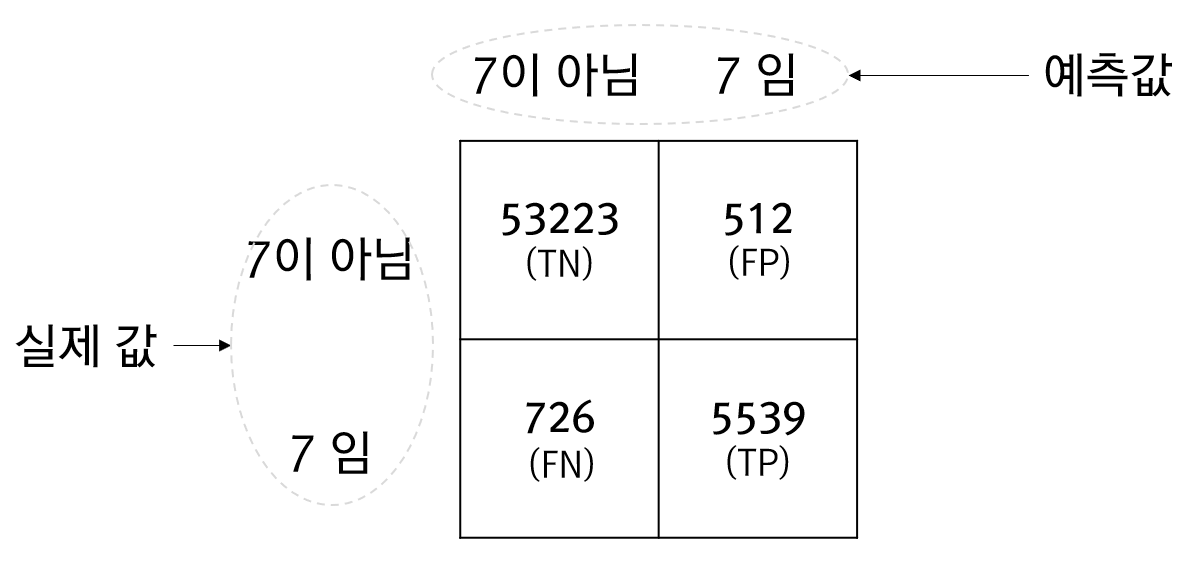
   - 혼동행렬을 이용한 평가지표
     - TP, TN, FP, FN, 정확도(Accuracy), 오분류율(Error Rate), 민감도(Sensitivity, (== Recall(재현율))), 특이도(Specificity), FR rate, 정밀도(Precision), F1 score, Fβ score, 카파 통꼐량
   - ROC curve
     - ROC curve: 수신자 판단 곡선, 위양성률(FPR, fall-out)과 재현율(recall, TPR)의 변화 시각화
     - AUC(Area Under the curve): ROC 곡선 아래 영역
  - Cohen's Kappa 통계량 

In [2]:
# 분류 평가를 위한 분류 데이터셋 + 모델 학습/예측

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

LR = LogisticRegression(max_iter = 500)

LR.fit(X_train, y_train)
pred = LR.predict(X_test)


In [44]:
# confusion matrix , 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) # 예측에 대한 혼동행렬 출력
#####
# [TN(True Negative(실제: 거짓, 예측: 거짓)),FP(False Positive(실제: 거짓, 예측: 참))]
# [FN(False Negative(실제: 참, 예측: 거짓)),TP(True Positive(실제: 참, 예측: 참))]
#####

array([[400,   5],
       [  2,  43]])

In [45]:
# accuracy(정확도), Error rate(오분류율)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, pred)) # 정확도: (TP + TN) /  (TP + FN + FP + TN)
print("Error Rate:",1-accuracy_score(y_test, pred)) # 오분류율: (FP + FN) / (TP + FN + FP + TN)

## 라벨링이 불균형한 데이터셋의 경우에는 정확도만으로는 분류모델의 유의미한 성능 지표를 얻을 수 없다
## (ex. 99%가 참이고, 1%가 거짓인 데이터셋, 그냥 참이라고 예측하면 정확도 99%)

Accuracy: 0.9844444444444445
Error Rate: 0.015555555555555545


In [46]:

# Recall(재현율 == Sensitivity(민감도)), Precision(정밀도)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall == Sensitivity:", recall_score(y_test,pred)) 
# 재현율, 민감도: 실제로 Positive인 범주 중에서 Positive로 올바르게 예측한 비율, TP / (TP + FN)
print("Precision:", precision_score(y_test, pred))
# 정밀도: Positive로 예측한 범줌 중에서 실제 Positive인 비율, TP / (TP + FP)

### 재현율 (recall)
## 재현율이 중요 지표인 경우, 실제 Positive 데이터를 Negative로 잘못 판단하면 안되는 경우
## ex. 암 판단 모델

### 정밀도 (Precision)
## 정밀도가 중요 지표인 경우, 실제 Negative 데이터를 Positive로 잘못 판단하면 안되는 경우
## ex. 스팸메일 분류 모델

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334


In [67]:
### 재현율 / 정밀도 트레이드오프
## 분류의 결정 임곗값(Threshold)을 조정하여 정밀도 또는 재현율의 수치를 높일 수 있지만
## 서로가 상호 보완적인 지표이기 때문에 한쪽을 높이면 한쪽은 떨어진다.

print('실제 class 값', y_test[75:80])
print()

pred_proba = LR.predict_proba(X_test)
pred = LR.predict(X_test)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba[75:80])
print('threshold가 0.5일 때, 예측한 class 값:', pred[75:80])
print('혼동행렬')
print(confusion_matrix(y_test, pred))
print()

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.99) # positive일 확률이 99% 이상이어야만 positive로 인정해주겠다
threshold_pred = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
print("threshold가 0.99일때, 예측한 class 값: ", threshold_pred[75:80].reshape(1,-1)) 
print("Recall == Sensitivity:", recall_score(y_test,threshold_pred)) # threshold 값이 커졌으므로, recall이 낮아진다
print("Precision:", precision_score(y_test, threshold_pred)) # threshold 값이 커졌으므로, precision이 높아진다
print(confusion_matrix(y_test, threshold_pred))
print()

실제 class 값 [0 0 1 1 0]

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99999997e-01 3.18517118e-09]
 [9.99999998e-01 1.93610001e-09]
 [1.90528323e-05 9.99980947e-01]
 [2.76216292e-02 9.72378371e-01]
 [9.99995802e-01 4.19814337e-06]]
threshold가 0.5일 때, 예측한 class 값: [0 0 1 1 0]
혼동행렬
[[400   5]
 [  2  43]]

threshold가 0.99일때, 예측한 class 값:  [[0. 0. 1. 0. 0.]]
Recall == Sensitivity: 0.8888888888888888
Precision: 1.0
[[405   0]
 [  5  40]]



In [91]:
# precision_recall_curve, 임계값에 따른 precision recall score
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba[:,1].reshape(-1,1))
# 임계값에 따른 precision recall score 추출

print('반환된 분류 결정 임곗값 배열의 shape: ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0],7)
df  = pd.DataFrame([np.round(thresholds[thr_index],2),np.round(precisions[thr_index],3),np.round(recalls[thr_index],3)], index = ['thresholds', 'precisions','recalls'])
df

반환된 분류 결정 임곗값 배열의 shape:  (76,)


,0,1,2,3,4,5,6,7,8,9,10
thresholds,0.000,0.000,0.000,0.020,0.600,0.980,1.000,1.0,1.000,1.000,1.000
precisions,0.592,0.638,0.710,0.782,0.896,1.000,1.000,1.0,1.000,1.000,1.000
recalls,1.000,0.978,0.978,0.956,0.956,0.911,0.756,0.6,0.444,0.289,0.133


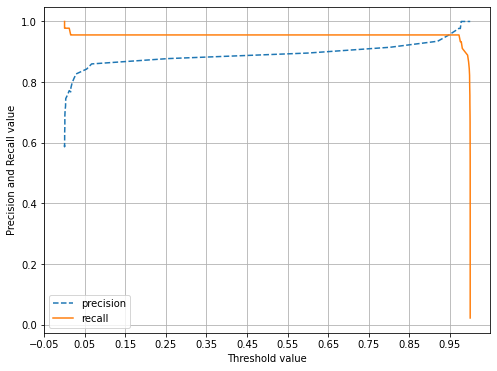

In [100]:
# precision_recall_curve 그리기

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  

  start,end = plt.xlim() # x축의 한계값 
  plt.xticks(np.round(np.arange(start,end,0.1),2)) # 눈금표시

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba[:,1].reshape(-1,1))

In [ ]:
### 정밀도와 재현율의 맹점
## 정밀도 = 예측이 postive인 범주 안에서 실제 positive의 비율 TP/(TP + FP)
## 재현율 = 실제 positive인 범주 안에서 예측이 positive인 비율 TP/(TP + FN)

## if threshold가 1에 가까운 수:
##   예측을 보수적으로 하게되어, 예측이 틀릴 확률이 현저히 줄어든다. -> precision_score = 1
## if threshold가 0에 가까운 수:
##   모든 사례를 positive로 예측하면, 실제 positive인 값들은 모두 positive로 예측된다 -> recall_score = 1
## 정밀도와 재현율이 적절히 조화되어서 종합적인 성능평가에 기여하여야한다. => F1 score

In [101]:
# F1 score, F1 = 2 * (precision * recall) / (precision + recall), precision과 recall의 조화평균
from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_test,pred))


f1 score:  0.924731182795699


In [106]:
# F-beta score, F-beta = (1+beta^2) * (precision * recall) / (beta^2 * precision + recall), recall에 beta만큼의 가중치를 준 F1 score
from sklearn.metrics import fbeta_score
print("Recall == Sensitivity:", recall_score(y_test,pred)) 
print("Precision:", precision_score(y_test, pred))
print('f1 score: ', f1_score(y_test,pred))
print('f2 score: ', fbeta_score(y_test,pred,beta = 2)) # recall에 2배 가중치, recall 값에 더 가까워진다
print('f0.5 score: ', fbeta_score(y_test,pred,beta = 0.5))# recall에 0.5배 가중치, precision 값에 더 가까워진다

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334
f1 score:  0.924731182795699
f2 score:  0.9429824561403511
f0.5 score:  0.9071729957805909


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

## classification_report & macro avg, weighted avg
#  https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       405
           1       0.90      0.96      0.92        45

    accuracy                           0.98       450
   macro avg       0.95      0.97      0.96       450
weighted avg       0.99      0.98      0.98       450



In [122]:
# FP rate, 실제로 Negative인 범주 중에서 Positive로 잘못 예측한 비율,FPR(거짓 긍정률) ,FP / (FP + TN)
# TP rate, 실제로 Positive인 범주 중에서 Positive로 예측한 비율, TPR(참 긍정률), TP / (FN + TP) == recall, sensitivity
# ROC curve(Receiver Operation Characteristic Curve, 수신자 판단 곡선), FPR을 x축으로, TPR을 y축으로한다
# AUC 값이 0.5이면 분류 능력이 없음, 1에 가까워질수록 분류 능력 좋음

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1].reshape(-1,1)) # thresholds를 조정하면서 roc_curve 생성

pd.DataFrame([thresholds.round(4),fpr.round(4),tpr.round(4)], index = ['thresholds','fpr','tpr'])

,0,1,2,3,4,5,6,7,8,9
thresholds,2.0,1.0000,0.9779,0.9757,0.9724,0.0156,0.0120,0.0005,0.0005,0.0
fpr,0.0,0.0000,0.0000,0.0025,0.0025,0.0321,0.0321,0.0765,0.0765,1.0
tpr,0.0,0.0222,0.9333,0.9333,0.9556,0.9556,0.9778,0.9778,1.0000,1.0


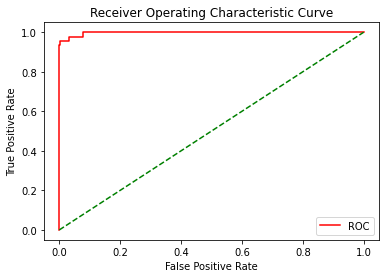

In [123]:
# roc curve 그리기
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--') # 기준이 되는 랜덤 분류기 auc = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [124]:
# roc_auc_score
from sklearn.metrics import roc_auc_score

print('AUC: ', roc_auc_score(y_test,pred)) # roc 곡선 아래 영역의 넓이 계산

AUC:  0.9716049382716049


In [ ]:
# 특이도 specificity = 1- FP rate()

In [3]:
# Cohen's kappa 통계량
# (P_A - P_C) / (1 - P_c), P_A: 2명의 평가자간 일치 확률, P_C 우연히 두 평가자에 의하여 일치된 평가를 받을 비율
# P_c = 1번 평가자가 True로 평가할 확률 * 2번 평가자가 True로 평가할 확률 + 1번 평가자가 False로 평가할 확률 * 2번 평가자가 False로 평가할 확률

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, pred)

# >0 거의 없는 일치도
# 0.0~0.2 약간의 일치도
# 0.2~0.4 어느정도 일치도
# 0.4~0.6 적당한 일치도
# 0.6~0.8 상당한 일치도
# 0.8~1.0 완벽한 일치도

0.9160671462829736

------------------
##1-2. 사이킷런 예제( 파마 인디언 당뇨병으로 예측하기,분류 평가 지표 사용)

In [36]:
# kaggle 파마 인디언 당뇨병 데이터 받아오기
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 1.60MB/s]


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts()) # negative 값이 상대적을 많음
diabetes_data.head()
# Pregnancies: 임신횟수, Glucose: 포도당 부하 검사 수치
# BloodPressure: 혈압, SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
# Insulin: 혈청 인슐린, BMI: 체질량지수
# DiabetesPedigreeFunction: 당뇨 내력 가중치 값, Age: 나이, Outcom: 클래스 결정 값(0 or 1)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
diabetes_data.info()
# 768개의 데이터, 누락값없음, 전부 숫자형 -> 결측치 처리, categorical feature encoding 불필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
# feature dataset X, label dataset y 추출
X = diabetes_data.iloc[:,:-1] # feature dataset
y = diabetes_data.iloc[:,-1] # label dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 156, stratify = y) # 클래스별로 층화추출

# 로지스틱 회귀로 학습 얘측 및 평가 수행
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


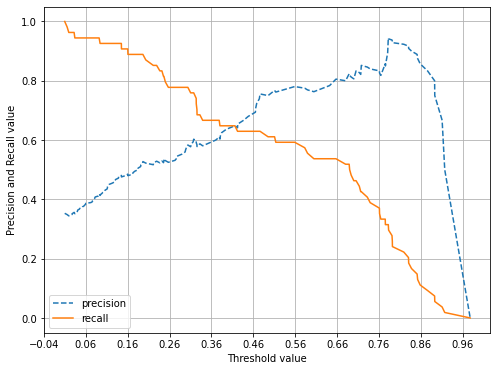

In [53]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize = (8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[:threshold_boundary], linestyle = '--', label = 'precision')
plt.plot(thresholds, recalls[:threshold_boundary], label = 'recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))

plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
plt.legend(); plt.grid()
plt.show()

# precision_recall_curve를 보면 threshold가 0.42 정도에서 precision과 recall이 균형을 이루지만 그 값이 0.7이하로 매우 낮다

In [54]:
diabetes_data.describe() #DF의 기본 통계량
# 값이 0인 항목이 굉장히 많다

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

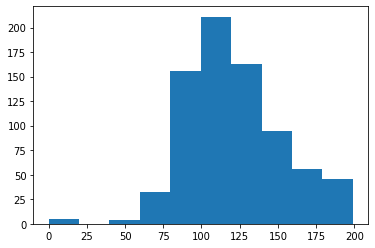

In [55]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [56]:
# 0값을 검사할 feature 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # Pregnancies는 출산횟수이므로 0이 나올 수 있음

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# feature 별로 반복하면서 데이터 값이 0인 데이터 건수를 출력하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

# Insulin과 SkunThickness feature는 각각 0의 값이 전체의 29%, 48%로 상당히 많다.
# 전체 데이터 개수가 768개로 많지 않기 때문에 0값 각각을 중앙값으로 대체한다

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [60]:
# zero_features 리스트 내부에 저장된 개별 feature들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features) 
# replace에서 list 값을 제공하면 순서에 맞춰 값을 채워넣는다

In [75]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# StandardScaler 클래스를 이용해 feature dataset에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱회귀를 학습/평가
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


In [81]:
from sklearn.preprocessing import Binarizer

# thresholds값의 변화에 따라 평가값의 변화 살펴보기
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_c1 = pred_proba[:,1]
eval = []
for custom_threshold in thresholds:
  binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1.reshape(-1,1))
  custom_predict = binarizer.transform(pred_proba_c1.reshape(-1,1))
  eval.append([accuracy_score(y_test,custom_predict),precision_score(y_test,custom_predict),
               recall_score(y_test,custom_predict),f1_score(y_test,custom_predict),roc_auc_score(y_test,custom_predict)])

df = pd.DataFrame(eval, index = thresholds , columns = ['accuracy','precision','recall','f1_score','roc_auc_score'])
df

# threshold = 0.48이 가장 적절해보인다

,accuracy,precision,recall,f1_score,roc_auc_score
0.30,0.714286,0.565789,0.796296,0.661538,0.733148
0.33,0.740260,0.600000,0.777778,0.677419,0.748889
0.36,0.746753,0.619048,0.722222,0.666667,0.741111
0.39,0.753247,0.633333,0.703704,0.666667,0.741852
0.42,0.779221,0.692308,0.666667,0.679245,0.753333
0.45,0.785714,0.705882,0.666667,0.685714,0.758333
0.48,0.798701,0.744681,0.648148,0.693069,0.764074
0.50,0.798701,0.767442,0.611111,0.680412,0.755556


In [95]:
# threshold를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))


print("오차행렬:\n",confusion_matrix(y_test, pred_th_048))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))

## binarizer.fit_transform()는 2D array만 받으므로 reshape를 통해 2D array로 바꿔주어야한다.
## y_test.shape  = (154,)이므로, pred_proba[:,1]도 .reshape(-1,1)를 하여 열벡터를 맞춰주어야 평가메서드를 사용할 수 있다

'\nprint("오차행렬:\n",confusion_matrix(y_test, pred_th_048))\nprint("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))\nprint("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))\nprint("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))\nprint("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))\nprint("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))\n'

In [96]:
pred_th_048.shape

(1, 154)